In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving citibike-tripdata.csv to citibike-tripdata.csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['citibike-tripdata.csv'].decode('utf-8')))


In [0]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station name']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station name']].drop_duplicates())


In [0]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station latitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station latitude']].drop_duplicates())


In [0]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station longitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station longitude']].drop_duplicates())


In [0]:
t1 = df[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = df[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

In [0]:
X = df_loc[['station latitude', 'station longitude']].values

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

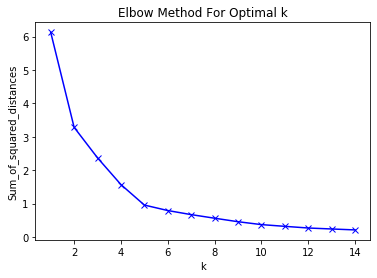

In [75]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

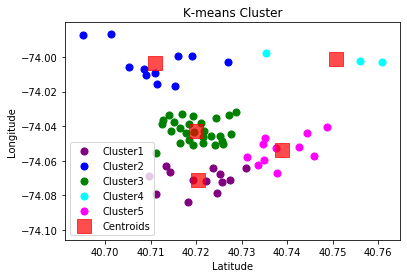

In [46]:
#KMeans clustering with k=5
km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('K-means Cluster')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

No handles with labels found to put in legend.


[ 0  0  1  0  3  1  2 -1  0  0  0  1  0  0  0  0  0  1  0  0 -1  1  0  0
  0  0  0  0  0  0  2  1  0 -1 -1  0  0  3  0 -1 -1 -1  0  2  3 -1  0  3
 -1 -1 -1 -1 -1  4 -1 -1  4 -1  4 -1 -1 -1  4 -1 -1 -1]
['y', 'b', 'g', 'r', 'c', 'p']


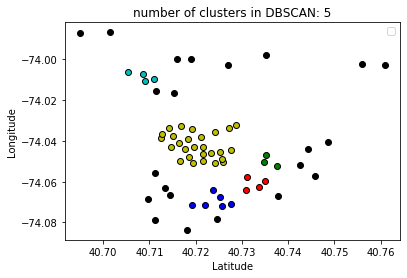

In [74]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

db = DBSCAN(eps=.005, min_samples=3).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

print(labels) 


unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r', 'c', 'p'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
	if k == -1: 
		# Black used for noise. 
		col = 'k'

	class_member_mask = (labels == k) 

	xy = X[class_member_mask & core_samples_mask] 
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
									markeredgecolor='k', 
									markersize=6) 

	xy = X[class_member_mask & ~core_samples_mask] 
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
									markeredgecolor='k', 
									markersize=6) 

plt.title('number of clusters in DBSCAN: %d' %n_clusters_) 
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show() 
